Widya Anastasya | anastasyawidya14@gmail.com

# DATA PREPARATION

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load Data

Data:
1. application_history_f
2. application_history_m
3. credit_history

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import data from Google drive (application_history_f)
female = pd.read_csv('/content/drive/My Drive/Project/Studi_Independen/application_history_f.csv')
female.head(5)

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,G,NM,MH,1,0,1,1,Sales staff,1,52,8
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,PG,D,MH,1,0,0,0,NaN,1,62,1001


In [ ]:
#Import data from Google drive (application_history_m)
male = pd.read_csv('/content/drive/My Drive/Project/Studi_Independen/application_history_m.csv')
male.head(5)

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5008804,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
1,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,NaN,2,33,12
2,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,Security staff,2,59,3
3,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2
4,5112956,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,Accountants,2,46,2


In [ ]:
#Import data from Google drive (application_history_f)
credit = pd.read_csv('/content/drive/My Drive/Project/Studi_Independen/credit_history.csv')
credit.head(5)

,Id_customer,Overdue
0,5001711,Tidak memiliki pinjaman
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0


## Data Merging

In [ ]:
#Merging data female and male
data_var = pd.concat([female,male])

In [ ]:
#Final merge with credit history forming final data
final_data = pd.merge(data_var, credit, on=['Id_customer'], how='inner')

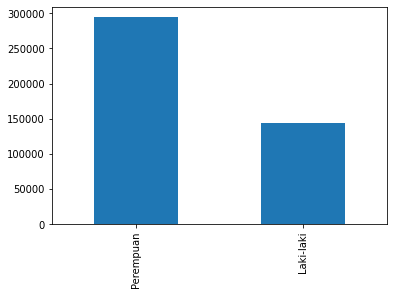

In [ ]:
#Making sure merging is successful
data_var['JK'].value_counts().plot.bar()

In [ ]:
#Making sure merging is successful
print(final_data.columns)

Index(['Id_customer', 'JK', 'KepemilikanMobil', 'KepemilikanProperti',
       'JmlAnak', 'Pendapatan', 'TipePendapatan', 'TingkatPendidikan',
       'StatusKeluarga', 'TipeRumah', 'FlagMobile', 'FlagWorkPhone',
       'FlagPhone', 'Email', 'Pekerjaan', 'JmlAnggotaKeluarga', 'Age',
       'Experience', 'Overdue'],
      dtype='object')


In [ ]:
#Adjust credit number
final_data = final_data[final_data['Overdue']!='Tidak memiliki pinjaman']
final_data['Overdue'] = final_data['Overdue'].replace(['0','1','2','3','4','5'],['0','1','1','1','1','1'])
final_data.tail()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience,Overdue
775040,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,G,NM,RA,1,0,0,0,Laborers,1,25,3,0
775041,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,G,NM,RA,1,0,0,0,Laborers,1,25,3,1
775042,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,G,NM,RA,1,0,0,0,Laborers,1,25,3,1
775043,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,G,NM,RA,1,0,0,0,Laborers,1,25,3,0
775044,5150337,Laki-laki,Tidak,Ya,0,112500.0,Bekerja,G,NM,RA,1,0,0,0,Laborers,1,25,3,0


In [ ]:
#Successful.


## Data Cleaning

### Missing Values

In [ ]:
#Checking for missing values
missing = final_data.isna().sum()
print(missing)

Id_customer                 0
JK                          0
KepemilikanMobil            0
KepemilikanProperti         0
JmlAnak                     0
Pendapatan                  0
TipePendapatan              0
TingkatPendidikan           0
StatusKeluarga              0
TipeRumah                   0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Pekerjaan              196600
JmlAnggotaKeluarga          0
Age                         0
Experience                  0
Overdue                     0
dtype: int64


In [ ]:
#Checking for percentage of missing values
missing = missing.to_frame(name='num_missing')
missing['perc_missing'] = (missing['num_missing']/final_data.shape[0])*100
for index, row in missing.iterrows():
    if (row['num_missing'] > 0):
        print ("For \"%s\" the number of missing values are: %d (%.0f%%)" %  (index,
                                                                     row['num_missing'],
                                                                    row['perc_missing']))

For "Pekerjaan" the number of missing values are: 196600 (31%)


In [ ]:
final_data.duplicated().sum()

592162

In [ ]:
final_data = final_data.drop_duplicates(keep='last')

In [ ]:
#Dropping missing values
data_fix = final_data.dropna()
data_fix.isna().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
Overdue                0
dtype: int64

In [ ]:
#Successfuly dropping missing values

In [ ]:
#Adjust data types
#Changing the data type to category
cols=data_fix.select_dtypes(exclude='int').columns.to_list()
data_fix[cols]=data_fix[cols].astype('category')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data_fix.describe()

,Id_customer,JmlAnak,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience
count,2.561200e+04,25612.000000,25612.0,25612.000000,25612.000000,25612.000000,25612.000000,25612.000000,25612.000000
mean,5.078705e+06,0.510425,1.0,0.270615,0.289981,0.103740,2.290020,40.538888,7.216930
std,4.187420e+04,0.795035,0.0,0.444286,0.453762,0.304929,0.954425,9.615501,6.445655
min,5.008806e+06,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,5.042247e+06,0.000000,1.0,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000
50%,5.078918e+06,0.000000,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,5.000000
75%,5.115585e+06,1.000000,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000
max,5.150487e+06,19.000000,1.0,1.000000,1.000000,1.000000,20.000000,67.000000,43.000000


In [ ]:
#Dropping irrelevant column
data_fix = data_fix.drop(['FlagMobile','Email'], axis=1)

In [ ]:
print(data_fix.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25612 entries, 2 to 775044
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id_customer          25612 non-null  int64   
 1   JK                   25612 non-null  category
 2   KepemilikanMobil     25612 non-null  category
 3   KepemilikanProperti  25612 non-null  category
 4   JmlAnak              25612 non-null  int64   
 5   Pendapatan           25612 non-null  category
 6   TipePendapatan       25612 non-null  category
 7   TingkatPendidikan    25612 non-null  category
 8   StatusKeluarga       25612 non-null  category
 9   TipeRumah            25612 non-null  category
 10  FlagWorkPhone        25612 non-null  int64   
 11  FlagPhone            25612 non-null  int64   
 12  Pekerjaan            25612 non-null  category
 13  JmlAnggotaKeluarga   25612 non-null  int64   
 14  Age                  25612 non-null  int64   
 15  Experience        

In [ ]:
data_fixi = data_fix

### Managing Outliers

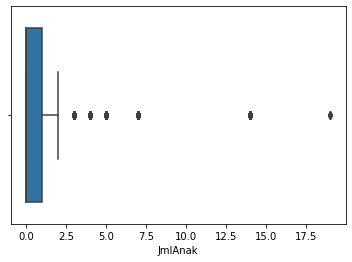

In [ ]:
#Figuring which int variable has outliers.
sns.boxplot(x=data_fix['JmlAnak'])

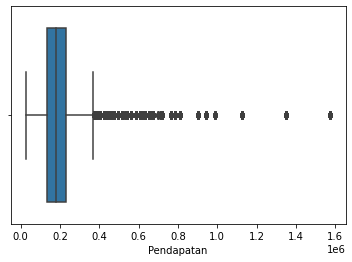

In [ ]:
sns.boxplot(x=data_fix['Pendapatan'])

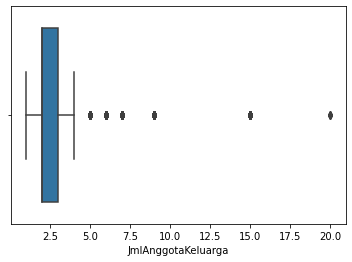

In [ ]:
sns.boxplot(x=data_fix['JmlAnggotaKeluarga'])

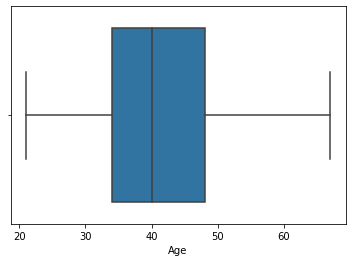

In [ ]:
sns.boxplot(x=data_fix['Age']) #No outliers found, doesnt need handling

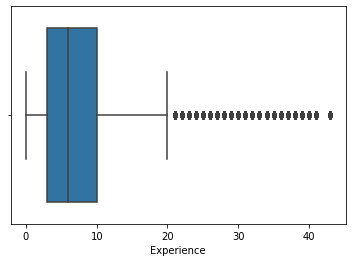

In [ ]:
sns.boxplot(x=data_fix['Experience'])

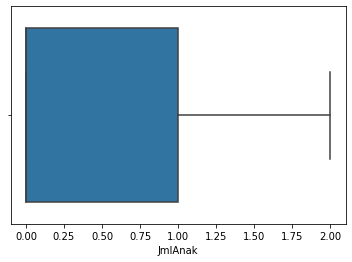

In [ ]:
#Handling outlier for 'JmlAnak'
percentile25 = data_fix['JmlAnak'].quantile(0.25)
percentile75 = data_fix['JmlAnak'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
data_fix[data_fix['JmlAnak'] > upper_limit]
data_fix[data_fix['JmlAnak'] < lower_limit]
new_df = data_fix[data_fix['JmlAnak'] < upper_limit]
new_df.shape
sns.boxplot(x=new_df['JmlAnak'])

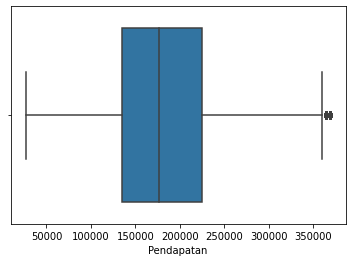

In [ ]:
#Handling outlier for 'Pendapatan'
percentile25 = new_df['Pendapatan'].quantile(0.25)
percentile75 = new_df['Pendapatan'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_df[new_df['Pendapatan'] > upper_limit]
new_df[new_df['Pendapatan'] < lower_limit]
new_dt = new_df[new_df['Pendapatan'] < upper_limit]
new_dt.shape
sns.boxplot(x=new_dt['Pendapatan'])

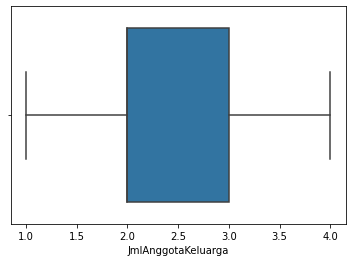

In [ ]:
#Handling outlier for 'JmlAnggotaKeluarga'
percentile25 = new_dt['JmlAnggotaKeluarga'].quantile(0.25)
percentile75 = new_dt['JmlAnggotaKeluarga'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_dt[new_dt['JmlAnggotaKeluarga'] > upper_limit]
new_dt[new_dt['JmlAnggotaKeluarga'] < lower_limit]
new_dx = new_df[new_df['JmlAnggotaKeluarga'] < upper_limit]
new_dx.shape
sns.boxplot(x=new_dx['JmlAnggotaKeluarga'])

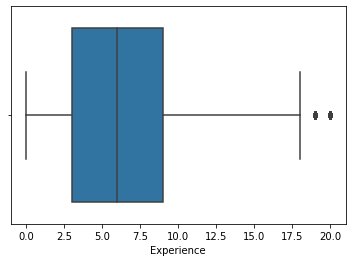

In [ ]:
#Handling outlier for 'Experience'
percentile25 = new_dx['Experience'].quantile(0.25)
percentile75 = new_dx['Experience'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
new_dx[new_dx['Experience'] > upper_limit]
new_dx[new_dx['Experience'] < lower_limit]
new_dz = new_df[new_df['Experience'] < upper_limit]
new_dz.shape
sns.boxplot(x=new_dz['Experience'])

In [ ]:
#Outlier sudah terhandle semua.

## Exploratory Data Analysis (EDA)

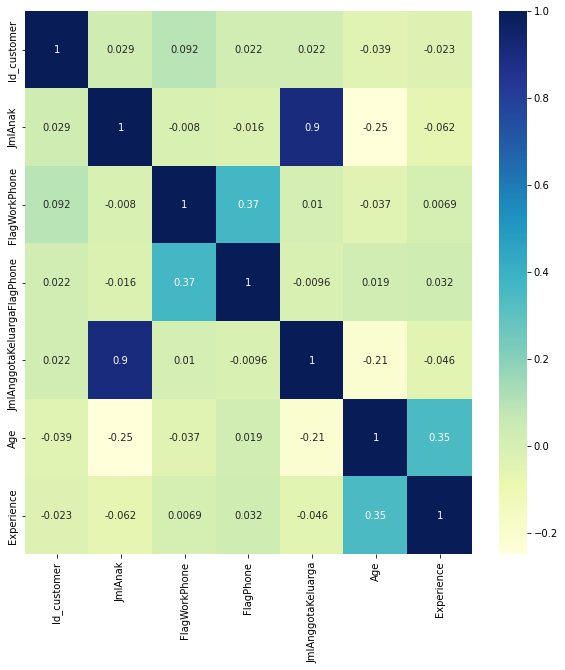

In [ ]:
#Heatmap Tabel Korelasi antar variabel
plt.figure(figsize = (10,10))
sns.heatmap(data_fix.corr(), cmap='YlGnBu',annot = True)

In [ ]:
print(data_fix.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25612 entries, 2 to 775044
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id_customer          25612 non-null  int64   
 1   JK                   25612 non-null  category
 2   KepemilikanMobil     25612 non-null  category
 3   KepemilikanProperti  25612 non-null  category
 4   JmlAnak              25612 non-null  int64   
 5   Pendapatan           25612 non-null  category
 6   TipePendapatan       25612 non-null  category
 7   TingkatPendidikan    25612 non-null  category
 8   StatusKeluarga       25612 non-null  category
 9   TipeRumah            25612 non-null  category
 10  FlagWorkPhone        25612 non-null  int64   
 11  FlagPhone            25612 non-null  int64   
 12  Pekerjaan            25612 non-null  category
 13  JmlAnggotaKeluarga   25612 non-null  int64   
 14  Age                  25612 non-null  int64   
 15  Experience        

- Jumlah anak dan jumlah anggota keluarga have a high degree of correlation (0.9). Possible to eliminate one of them.

In [ ]:
#Eliminating Jumlah Anak
data_fix = data_fix.drop(['JmlAnak'], axis=1)

Text(0.5, 1.0, 'Target Distribution')

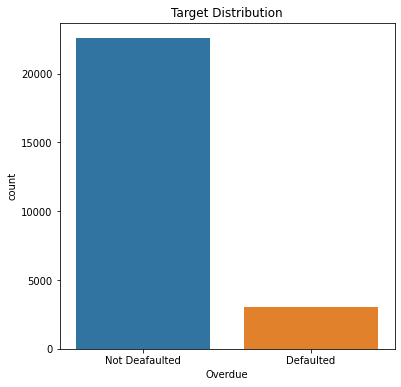

In [ ]:
#Menghitung gagal bayar dan sukses bayar
plt.figure(figsize=(6,6))
sns.countplot(data_fix['Overdue'])
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

Text(0.5, 1.0, 'Age distribution')

<Figure size 432x432 with 0 Axes>

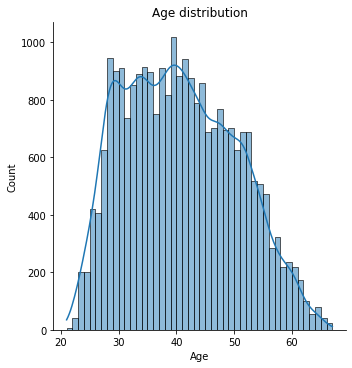

In [ ]:
#Menghitung sebaran usia
plt.figure(figsize=(6,6))
sns.displot(data_fix['Age'], kde=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title("Age distribution")

Text(0.5, 1.0, 'Gender Distribution')

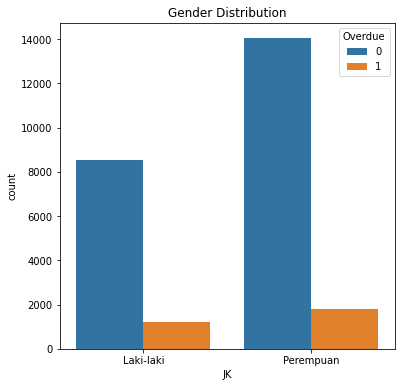

In [ ]:
#Gender dan Overdue?
plt.figure(figsize=(6,6))
sns.countplot('JK',hue='Overdue',data=data_fix)
plt.title("Gender Distribution")
#Answer: Perempuan lebih banyak sukses bayar dari laki-laki, laki-laki lebih banyak gagal bayar

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Education Distribution')

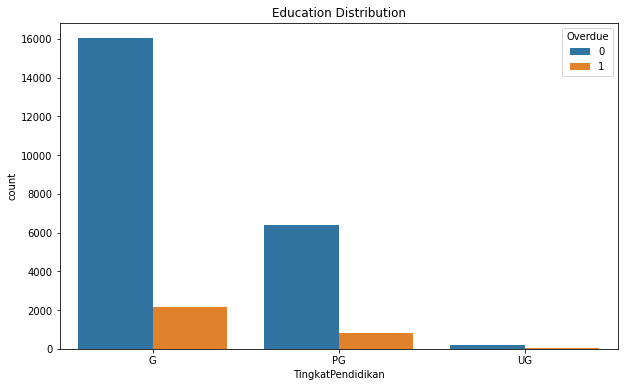

In [ ]:
# Apakah pendidikan mempengaruhi kemampuan membayar?
plt.figure(figsize=(10,6))
sns.countplot('TingkatPendidikan', hue='Overdue',data= data_fix)
#plt.xticks([0,1,2,3],labels=["graduate school", "university",'high school','others'])
plt.title("Education Distribution")
#Answer: Lulusan S2 memiliki kontribusi terbesar baik dalam peminjaman kredit maupun sukses dan gagal bayar.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'JmlAnggotaKeluarga')

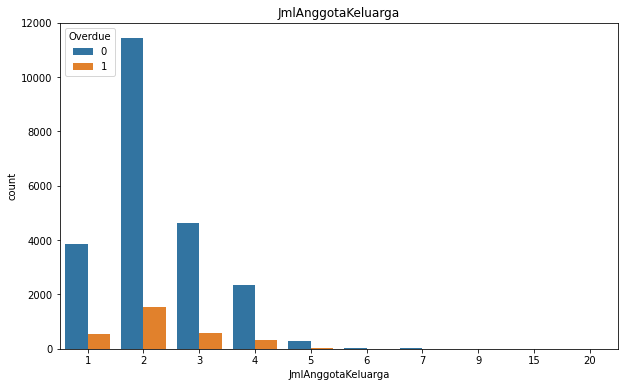

In [ ]:
#Apakah jumlah anggota berpengaruh?
plt.figure(figsize=(10,6))
sns.countplot('JmlAnggotaKeluarga',hue='Overdue',data= data_fix)
plt.title("JmlAnggotaKeluarga")
#Answer: Peminjam dengan anggota keluarga sebanyak 2 orang mempunyai jumlah peminjam paling banyak, sukses bayar maupun gagal bayar.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'StatusKeluarga')

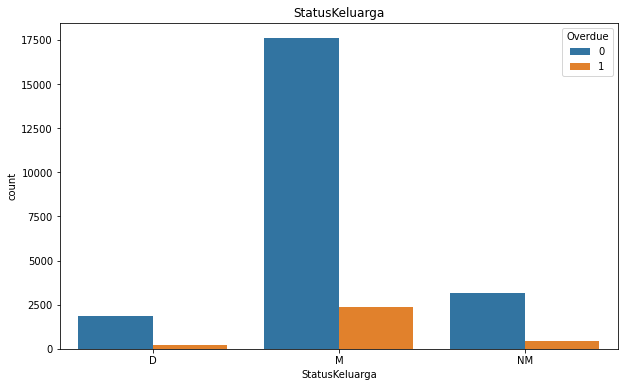

In [ ]:
#Apakah status pernikahan berpengaruh?
plt.figure(figsize=(10,6))
sns.countplot('StatusKeluarga',hue='Overdue',data= data_fix)
plt.title("StatusKeluarga")
#Orang dengan status menikah merupakan pemohon kredit paling banyak.

## Extract Processed Data

In [ ]:
from google.colab import files

In [ ]:
data_fixi.to_csv('data_fixi.csv',index=False,header=True)
files.download('data_fixi.csv')